我們想用神經網路去近似y = x^2 函數

https://machinelearningmastery.com/neural-networks-are-function-approximators/

In [10]:
# example of fitting a neural net on x vs x^2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot


整理 x, y shape 變成 2 維

In [15]:
# define the dataset
x = asarray([i for i in range(-50,51)])
y = asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))


-50 50 0.0 2500.0


調適大小

In [16]:
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())


0.0 1.0 0.0 1.0


建模與訓練


In [12]:
# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# ft the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=0)


預測並還原

In [13]:
# make predictions for the input data
yhat = model.predict(x)
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
# report model error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))


MSE: 80879.325


繪圖比較

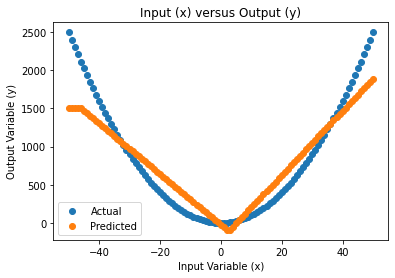

In [14]:
# plot x vs y
pyplot.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()